<a href="https://colab.research.google.com/github/seeraj99/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/exercise_submissions/Week_2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### WEEK 2 Exercises

### Name: Surajo Nuhu Umar
### Email: surajonuhuumar@gmail.com
### Title: Week 1 Solution

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [3]:
# Create weight and bias
weight = 0.3
bias = 0.9

# Create 100 datasets range values (0-1) taking a step of 0.1
start = 0
end = 1
step = 0.01

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
print(X.shape,y.shape)
X[:10], y[:10]

torch.Size([100, 1]) torch.Size([100, 1])


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [4]:
# Split data into 80% training and 20% testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

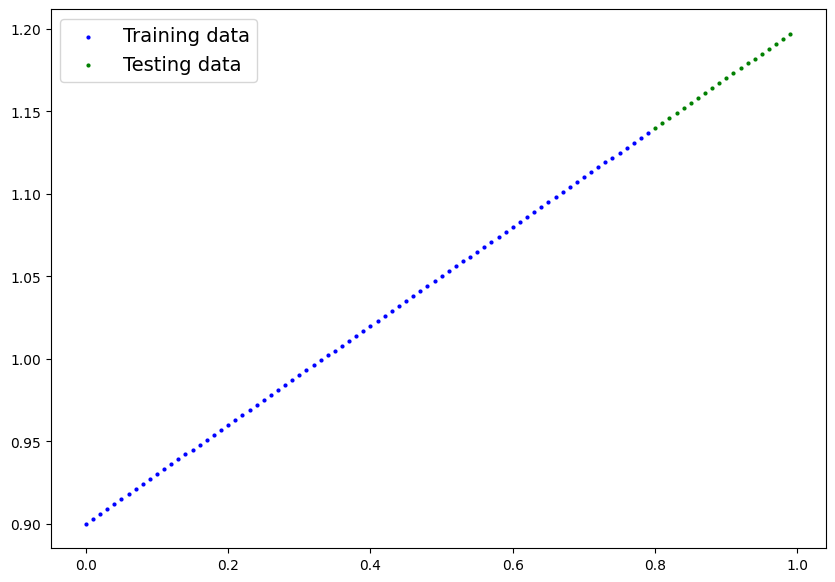

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions(X_train, y_train, X_test, y_test)

In [6]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # the linear regression formula (y = m*x + b) where m=self.weights and b=self.bais

In [7]:
torch.manual_seed(42)

model_ = LinearRegressionModel()


model_.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
next(model_.parameters()).device

device(type='cpu')

In [9]:
model_.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_.parameters()).device

device(type='cpu')

In [10]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer with learning rate 0.01
optimizer = torch.optim.SGD(params=model_.parameters(),lr=0.05)

In [11]:
torch.manual_seed(42)

# Setting the number of epochs to 300
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


 # Putting data on the available device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    ### Training
    model_.train()

    # 1. Forward pass
    y_pred = model_(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    # Put the model in evaluation mode
    model_.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float))


     # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | MAE Train Loss: 0.7566978335380554 | MAE Test Loss: 0.6706764101982117 
Epoch: 20 | MAE Train Loss: 0.045848846435546875 | MAE Test Loss: 0.1025409922003746 
Epoch: 40 | MAE Train Loss: 0.01159634068608284 | MAE Test Loss: 0.024365227669477463 
Epoch: 60 | MAE Train Loss: 0.014755968935787678 | MAE Test Loss: 0.0626467764377594 
Epoch: 80 | MAE Train Loss: 0.014755968935787678 | MAE Test Loss: 0.0626467764377594 
Epoch: 100 | MAE Train Loss: 0.014755968935787678 | MAE Test Loss: 0.0626467764377594 
Epoch: 120 | MAE Train Loss: 0.014755968935787678 | MAE Test Loss: 0.0626467764377594 
Epoch: 140 | MAE Train Loss: 0.014755968935787678 | MAE Test Loss: 0.0626467764377594 
Epoch: 160 | MAE Train Loss: 0.014755968935787678 | MAE Test Loss: 0.0626467764377594 
Epoch: 180 | MAE Train Loss: 0.014755968935787678 | MAE Test Loss: 0.0626467764377594 
Epoch: 200 | MAE Train Loss: 0.014755968935787678 | MAE Test Loss: 0.0626467764377594 
Epoch: 220 | MAE Train Loss: 0.014755968935787678 

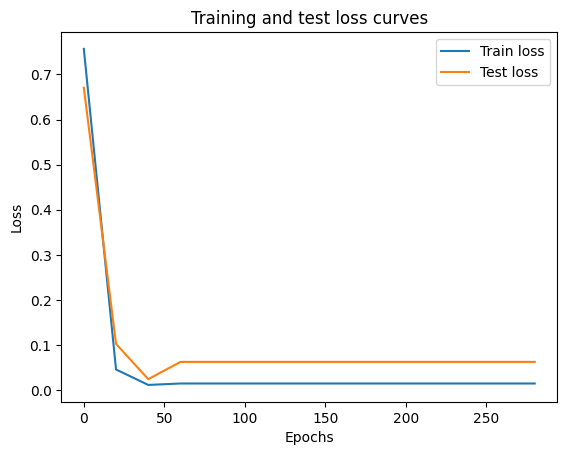

In [13]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [14]:
model_.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_(X_test)
y_preds

tensor([[1.1331],
        [1.1363],
        [1.1395],
        [1.1427],
        [1.1459],
        [1.1491],
        [1.1523],
        [1.1555],
        [1.1587],
        [1.1619],
        [1.1651],
        [1.1683],
        [1.1715],
        [1.1747],
        [1.1778],
        [1.1810],
        [1.1842],
        [1.1874],
        [1.1906],
        [1.1938]])

In [15]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "week2_model_.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/week2_model_.pth


In [16]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model = LinearRegressionModel()

# Load model state dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model.to(device)

print(f"Loaded model:\n{loaded_model}")
print(f"Model on device:\n{next(loaded_model.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cpu


<ipython-input-16-3f92ea4996e8>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [17]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])